In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Image Classification

In [2]:
X_train = np.load('Fashion_MNIST/X_train.npy')
y_train = np.load('Fashion_MNIST/y_train.npy')
X_test = np.load('Fashion_MNIST/X_test.npy')
y_test = np.load('Fashion_MNIST/y_test.npy')

In [3]:
label2cat = {0: 'T-shirt/top',
             1: 'Trouser',
             2: 'Pullover',
             3: 'Dress',
             4: 'Coat',
             5: 'Sandal',
             6: 'Shirt',
             7: 'Sneaker',
             8: 'Bag',
             9: 'Ankle boot'}

'Sandal'

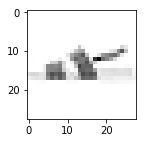

In [4]:
plt.figure(figsize=(2, 2))
i = np.random.randint(5000)
plt.imshow(X_train[i].reshape(28, 28), cmap='Greys')
label2cat[y_train[i]]

Choose an algorithm that you think it would perform better than the others

Make a pipeline of `StandardScaler`, `PCA` and your classifier of choice.

Train and evaluation your result by using `GridsearchCV` for finding the best parameters for your classifier.

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, f1_score

In [7]:
X_train = X_train/255
X_test = X_test/255

### KNN

In [8]:
steps = [('scaler', StandardScaler()),
         ('pca', PCA()),
         ('clf', KNeighborsClassifier())]

pipe_knn = Pipeline(steps)

pipe_knn.fit(X_train, y_train)
train_predictions = pipe_knn.predict(X_train)
test_predictions = pipe_knn.predict(X_test)

params = {"pca__n_components":[0.85, 0.9, 0.95],
         "clf__n_neighbors":[5, 10, 20]}

gs_pipe_knn = GridSearchCV(pipe_knn, params, scoring='f1_macro', cv=3, verbose=1)
gs_pipe_knn.fit(X_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:  3.0min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('clf', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'pca__n_components': [0.85, 0.9, 0.95], 'clf__n_neighbors': [5, 10, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1_macro', verbose=1)

In [9]:
train_predictions = gs_pipe_knn.predict(X_train)
test_predictions = gs_pipe_knn.predict(X_test)

print("TRAIN:")
print(classification_report(y_train, train_predictions))

print("TEST:")
print(classification_report(y_test, test_predictions))

TRAIN:
             precision    recall  f1-score   support

          0       0.79      0.90      0.84       457
          1       0.99      0.97      0.98       556
          2       0.80      0.81      0.80       504
          3       0.92      0.89      0.90       501
          4       0.76      0.86      0.81       488
          5       0.96      0.93      0.94       493
          6       0.76      0.60      0.67       493
          7       0.94      0.94      0.94       512
          8       0.97      0.93      0.95       490
          9       0.91      0.97      0.94       506

avg / total       0.88      0.88      0.88      5000

TEST:
             precision    recall  f1-score   support

          0       0.84      0.80      0.82        20
          1       0.96      0.96      0.96        27
          2       0.79      0.81      0.80        27
          3       0.74      0.82      0.78        17
          4       0.71      0.71      0.71        21
          5       1.00      0

In [10]:
gs_pipe_knn.best_params_

{'clf__n_neighbors': 5, 'pca__n_components': 0.9}

### Logistic regression

In [16]:
steps = [('scaler', StandardScaler()),
         ('pca', PCA()),
         ('clf', LogisticRegression())]

pipe_lr = Pipeline(steps)

pipe_lr.fit(X_train, y_train)
train_predictions = pipe_lr.predict(X_train)
test_predictions = pipe_lr.predict(X_test)

params = {"pca__n_components":[0.85, 0.9, 0.95, 0.99],
         "clf__penalty":["l1", "l2"],
         "clf__C":[0.8, 0.9, 0.95]}

gs_pipe_lr = GridSearchCV(pipe_lr, params, scoring='f1_macro', cv=2, verbose=1)
gs_pipe_lr.fit(X_train, y_train)

Fitting 2 folds for each of 24 candidates, totalling 48 fits


[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:  6.2min finished


GridSearchCV(cv=2, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('clf', LogisticRegression(C=1.0, class_weight=None, dua...y='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'pca__n_components': [0.85, 0.9, 0.95, 0.99], 'clf__penalty': ['l1', 'l2'], 'clf__C': [0.8, 0.9, 0.95]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1_macro', verbose=1)

In [17]:
gs_pipe_lr.best_params_

{'clf__C': 0.8, 'clf__penalty': 'l1', 'pca__n_components': 0.9}

In [18]:
train_predictions = gs_pipe_lr.predict(X_train)
test_predictions = gs_pipe_lr.predict(X_test)

print("TRAIN:")
print(classification_report(y_train, train_predictions))

print("TEST:")
print(classification_report(y_test, test_predictions))

TRAIN:
             precision    recall  f1-score   support

          0       0.82      0.85      0.84       457
          1       0.98      0.98      0.98       556
          2       0.77      0.77      0.77       504
          3       0.88      0.91      0.89       501
          4       0.77      0.83      0.80       488
          5       0.96      0.97      0.96       493
          6       0.74      0.60      0.66       493
          7       0.96      0.95      0.95       512
          8       0.96      0.97      0.97       490
          9       0.96      0.97      0.97       506

avg / total       0.88      0.88      0.88      5000

TEST:
             precision    recall  f1-score   support

          0       0.89      0.80      0.84        20
          1       0.93      1.00      0.96        27
          2       0.88      0.78      0.82        27
          3       0.82      0.82      0.82        17
          4       0.76      0.62      0.68        21
          5       0.88      0

### Random Forest

In [20]:
steps = [('scaler', StandardScaler()),
         ('pca', PCA()),
         ('clf', RandomForestClassifier())]

pipe_rf = Pipeline(steps)

pipe_rf.fit(X_train, y_train)
train_predictions = pipe_rf.predict(X_train)
test_predictions = pipe_rf.predict(X_test)

params = {"pca__n_components":[0.8, 0.85, 0.9],
          "clf__n_estimators":[10, 50, 100, 200],
          "clf__max_depth":[None, 3, 5, 10],
          "clf__criterion": ['gini', 'entropy']}

gs_pipe_rf = GridSearchCV(pipe_rf, params, scoring='f1_macro', cv=2, verbose=1)
gs_pipe_rf.fit(X_train, y_train)

Fitting 2 folds for each of 96 candidates, totalling 192 fits


[Parallel(n_jobs=1)]: Done 192 out of 192 | elapsed: 14.5min finished


GridSearchCV(cv=2, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('clf', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
         ...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'pca__n_components': [0.8, 0.85, 0.9], 'clf__n_estimators': [10, 50, 100, 200], 'clf__max_depth': [None, 3, 5, 10], 'clf__criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1_macro', verbose=1)

In [21]:
gs_pipe_lr.best_params_

{'clf__C': 0.8, 'clf__penalty': 'l1', 'pca__n_components': 0.9}

In [22]:
train_predictions = gs_pipe_lr.predict(X_train)
test_predictions = gs_pipe_lr.predict(X_test)

print("TRAIN:")
print(classification_report(y_train, train_predictions))

print("TEST:")
print(classification_report(y_test, test_predictions))

TRAIN:
             precision    recall  f1-score   support

          0       0.82      0.85      0.84       457
          1       0.98      0.98      0.98       556
          2       0.77      0.77      0.77       504
          3       0.88      0.91      0.89       501
          4       0.77      0.83      0.80       488
          5       0.96      0.97      0.96       493
          6       0.74      0.60      0.66       493
          7       0.96      0.95      0.95       512
          8       0.96      0.97      0.97       490
          9       0.96      0.97      0.97       506

avg / total       0.88      0.88      0.88      5000

TEST:
             precision    recall  f1-score   support

          0       0.89      0.80      0.84        20
          1       0.93      1.00      0.96        27
          2       0.88      0.78      0.82        27
          3       0.82      0.82      0.82        17
          4       0.76      0.62      0.68        21
          5       0.88      0